WEEK 7:
Implement Naive Bayes classifier for dataset stored as CSV file.

Accuracy: 0.7963759213759214
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.68      0.32      0.44      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512



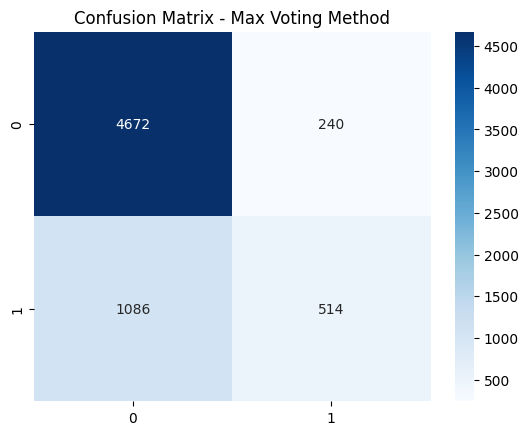

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'income.csv'  # Update this path with the correct location of your CSV file
data = pd.read_csv(file_path)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop(' <=50K', axis=1)
y = data[' <=50K']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()